In [1]:
# pip install spotipy

# greatest_hits_ever_df.drop(['track_id'], axis=1)
# greatest_hits_ever_df
# greatest_hits_ever_df.to_csv('greatest_hits_ever.csv')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
cid = 'XXXXXXXXXXXXXXXXXXXXXXX'
secret = 'XXXXXXXXXXXXXXXXXXXXXXXX'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
# 1000 of the greatest hits ever: Iris Fernanda 0hKruppKCtqPcSYgnCCVBg
sp.user_playlist_tracks("Iris Fernanda","0hKruppKCtqPcSYgnCCVBg")

{'href': 'https://api.spotify.com/v1/playlists/0hKruppKCtqPcSYgnCCVBg/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2020-07-04T22:44:13Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/0cie55818aud9lswjbozf2pu6'},
    'href': 'https://api.spotify.com/v1/users/0cie55818aud9lswjbozf2pu6',
    'id': '0cie55818aud9lswjbozf2pu6',
    'type': 'user',
    'uri': 'spotify:user:0cie55818aud9lswjbozf2pu6'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'compilation',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
       'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
       'id': '0LyfQWJT6nXafLPZqxe9Of',
       'name': 'Various Artists',
       'type': 'artist',
       'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR

In [4]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

def get_songs(username, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name","track_id","danceability","energy","key","loudness","mode","speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = get_playlist_tracks(username, playlist_id)
    
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        playlist_features["popularity"] = track["track"]["popularity"]
        playlist_features["duration"] = track["track"]["duration_ms"]
        playlist_features["date"] = track["track"]["album"]["release_date"]
        playlist_features["explicit"] = track["track"]["explicit"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [3])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [5]:
df_original = get_songs("Iris Fernanda","0hKruppKCtqPcSYgnCCVBg")

In [52]:
df = df_original.drop(['track_id', 'duration_ms'], axis=1)

In [8]:
# before conducting any EPA check the df for missing values
pd.isnull(df).sum()

artist              0
album               0
track_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
popularity          0
duration            0
date                0
explicit            0
dtype: int64

In [53]:
# change the numeric columns from 'object' data type to a numeric data type
# select columns
cols = df.columns.drop(['artist', 'album', 'track_name', 'date','popularity', 'duration'])

# subset of columns, apply function to_numeric to them
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')

df['date'] = df['date'].apply(pd.to_datetime, errors = 'coerce')

# see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist            1000 non-null   object        
 1   album             1000 non-null   object        
 2   track_name        1000 non-null   object        
 3   danceability      1000 non-null   float64       
 4   energy            1000 non-null   float64       
 5   key               1000 non-null   int64         
 6   loudness          1000 non-null   float64       
 7   mode              1000 non-null   int64         
 8   speechiness       1000 non-null   float64       
 9   instrumentalness  1000 non-null   float64       
 10  liveness          1000 non-null   float64       
 11  valence           1000 non-null   float64       
 12  tempo             1000 non-null   float64       
 13  time_signature    1000 non-null   int64         
 14  popularity        1000 no

In [54]:
# convert duration from milliseconds to seconds
df['duration'] = df['duration'].apply(lambda x: round(x/1000))
df['year'] = df['date'].dt.year
df = df[df['year'] < 2020]
df

,artist,album,track_name,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,popularity,duration,date,explicit,year
0,Various Artists,Singin' in the Rain (Original Motion Picture S...,Singin' In The Rain,0.354,0.241,5,-13.811,1,0.0334,0.000274,0.1650,0.4080,135.646,4,53.0,294,1952-04-11,False,1952
1,Various Artists,Rare Rock 'n Roll Essentials,Kansas City,0.720,0.539,0,-13.298,1,0.0453,0.000017,0.2580,0.8160,121.174,4,7.0,166,2013-03-15,False,2013
2,Nat King Cole,Unforgettable,Unforgettable,0.349,0.182,5,-13.507,1,0.0310,0.015200,0.1430,0.1780,136.094,3,66.0,192,1954-01-01,False,1954
3,The Platters,The Magic Touch: An Anthology,Only You (And You Alone),0.486,0.231,3,-12.060,1,0.0354,0.000000,0.1250,0.3030,80.049,4,55.0,157,1991-01-01,False,1991
4,Bo Diddley,Bo Diddley,I'm A Man,0.513,0.546,0,-15.672,1,0.0391,0.000000,0.1700,0.8340,85.527,4,54.0,165,1958-01-01,False,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tom Jones,Reload,Sexbomb,0.801,0.876,8,-3.940,0,0.0446,0.000014,0.1040,0.9320,122.980,4,0.0,212,1999-01-01,False,1999
996,Jamiroquai,Synkronized,Canned Heat,0.700,0.865,9,-5.827,0,0.1330,0.000076,0.0718,0.7800,128.040,4,10.0,332,1999-06-08,False,1999
997,Santana,Supernatural (Legacy Edition),Smooth,0.609,0.923,9,-3.908,1,0.0338,0.000005,0.2950,0.9610,115.994,4,0.0,295,1999-01-01,False,1999
998,Pet Shop Boys,Nightlife,New York City Boy,0.720,0.990,2,-4.796,0,0.0473,0.000070,0.2230,0.8780,130.972,4,35.0,315,1999-10-08,False,1999


In [11]:
# most popular songs
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,999.0,0.588553,0.162453,0.1310,0.4720,0.595000,0.70950,0.980
energy,999.0,0.621036,0.204423,0.0348,0.4700,0.631000,0.79100,0.990
key,999.0,5.236236,3.480298,0.0000,2.0000,5.000000,9.00000,11.000
loudness,999.0,-9.597857,3.262662,-23.9200,-11.6920,-9.406000,-7.20100,-1.692
mode,999.0,0.710711,0.453660,0.0000,0.0000,1.000000,1.00000,1.000
speechiness,999.0,0.054273,0.044128,0.0224,0.0323,0.039600,0.05685,0.425
instrumentalness,999.0,0.048150,0.152761,0.0000,0.0000,0.000108,0.00565,0.959
liveness,999.0,0.194528,0.171376,0.0165,0.0857,0.131000,0.25400,0.989
valence,999.0,0.643118,0.247524,0.0388,0.4455,0.693000,0.86100,0.986
tempo,999.0,121.022861,25.837779,63.0710,104.8195,120.117000,133.64100,203.270


In [12]:
df['year'] = df['year'] - df['year'] % 10
df_decade = (df.groupby(['year']).mean().reset_index())
df_decade

,year,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,popularity,duration,explicit
0,1950,0.580973,0.604405,5.243243,-9.000000,0.810811,0.080408,0.031248,0.230681,0.766459,130.299514,3.945946,50.378378,155.810811,0.000000
1,1960,0.538378,0.560432,5.047872,-9.625697,0.760638,0.046841,0.027709,0.189056,0.671510,120.946330,3.882979,54.558511,176.489362,0.000000
2,1970,0.576709,0.598947,5.235088,-10.252804,0.691228,0.052194,0.076612,0.195888,0.619081,120.295761,3.943860,53.017544,260.607018,0.003509
3,1980,0.631309,0.682267,5.290323,-9.592959,0.686636,0.058860,0.036292,0.188629,0.653274,120.003364,3.981567,53.972350,257.589862,0.009217
4,1990,0.615796,0.661182,5.437956,-8.671869,0.613139,0.054417,0.034943,0.185305,0.563045,119.333044,3.948905,44.905109,270.861314,0.014599
5,2000,0.604583,0.663900,5.200000,-9.005350,0.783333,0.057082,0.046235,0.202890,0.746800,126.704667,3.950000,34.183333,218.116667,0.000000
6,2010,0.576773,0.580307,5.213333,-9.513867,0.800000,0.052128,0.059540,0.212459,0.636373,120.892227,3.933333,35.226667,209.586667,0.000000


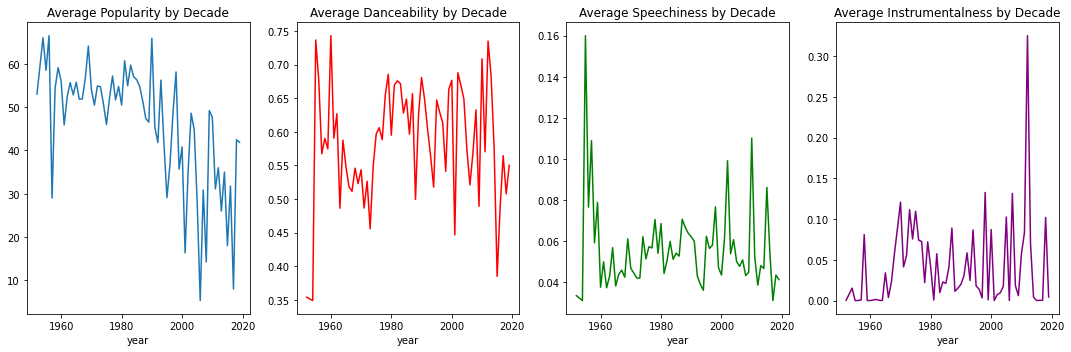

In [222]:
df_decade = (df.groupby(['year']).mean().reset_index())

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

g1 = sns.lineplot(data = df_decade, x = "year", y = "popularity", ax=ax[0])
g2 = sns.lineplot(data = df_decade, x = "year", y = "danceability", ax=ax[1], color = 'red')
g3 = sns.lineplot(data = df_decade, x = "year", y = "speechiness", ax=ax[2], color ='green')
g4 = sns.lineplot(data = df_decade, x = "year", y = "instrumentalness", ax=ax[3], color = 'purple')

#g1.set(yticklabels=[])  # remove the tick labels
#g2.set(yticklabels=[])  
#g3.set(yticklabels=[])  
#g4.set(yticklabels=[])  

g1.set(title='Average Popularity by Decade')  # add a title
g2.set(title='Average Danceability by Decade')
g3.set(title='Average Speechiness by Decade')
g4.set(title='Average Instrumentalness by Decade')

g1.set(ylabel=None)  # remove the axis label
g2.set(ylabel=None)  
g3.set(ylabel=None)  
g4.set(ylabel=None)

plt.tight_layout()
plt.show()

fig.savefig('trends.png')

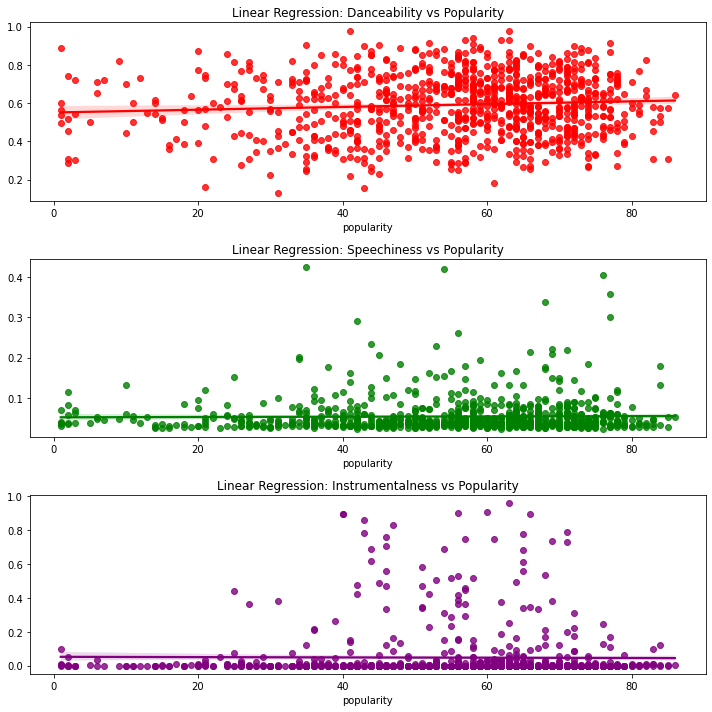

In [216]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

df_nozero = df[df['popularity'] > 0]

g1 = sns.regplot(data = df_nozero, x = "popularity", y = "danceability", ax=ax[0], color = 'red')
g2 = sns.regplot(data = df_nozero, x = "popularity", y = "speechiness", ax=ax[1], color = 'green')
g3 = sns.regplot(data = df_nozero, x = "popularity", y = "instrumentalness", ax=ax[2], color = 'purple')
 

g1.set(title='Linear Regression: Danceability vs Popularity')  # add a title
g2.set(title='Linear Regression: Speechiness vs Popularity')
g3.set(title='Linear Regression: Instrumentalness vs Popularity')


g1.set(ylabel=None)  # remove the axis label
g2.set(ylabel=None)  
g3.set(ylabel=None)  

#g1.set(xlabel=None)  # remove the axis label
#g2.set(xlabel=None)  
#g3.set(xlabel=None)  

plt.tight_layout()
plt.show()

fig.savefig('regression_three.png')


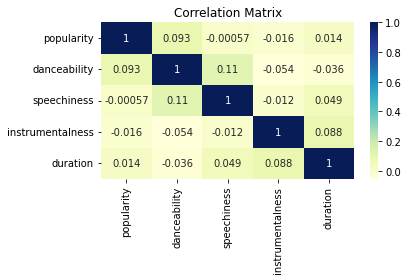

In [228]:
new_df = df[['popularity', 'danceability', 'speechiness', 'instrumentalness','duration']]
heatmap = sns.heatmap(new_df.corr(), annot = True, cmap='YlGnBu')
heatmap.set_title('Correlation Matrix')
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

In [201]:
df.sort_values('popularity',ascending = False).head(10)

,artist,album,track_name,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,popularity,duration,date,explicit,year
801,Tears For Fears,Songs From The Big Chair (Super Deluxe Edition),Everybody Wants To Rule The World,0.645,0.795,7,-12.095,1,0.0527,0.003890,0.1040,0.535,112.067,4,86.0,251,1985-02-25,False,1985
438,Aerosmith,Aerosmith,Dream On,0.307,0.433,1,-10.057,1,0.0290,0.000091,0.3320,0.224,160.900,4,85.0,267,1973-01-05,False,1973
810,a-ha,Hunting High and Low,Take on Me,0.573,0.902,6,-7.638,0,0.0540,0.001250,0.0928,0.876,84.412,4,85.0,225,1985-06-01,False,1985
813,Bon Jovi,Slippery When Wet,Livin' On A Prayer,0.532,0.887,0,-3.757,1,0.0335,0.000214,0.2940,0.795,122.511,4,84.0,249,1986-08-16,False,1986
647,AC/DC,Highway to Hell,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.001580,0.1560,0.423,115.728,4,84.0,208,1979-07-27,False,1979
739,Elton John,Too Low For Zero,I'm Still Standing,0.504,0.904,6,-6.863,1,0.1790,0.121000,0.1400,0.772,176.808,4,84.0,183,1983-05-30,False,1983
846,Guns N' Roses,Appetite For Destruction,Sweet Child O' Mine,0.454,0.910,6,-7.766,1,0.0448,0.099600,0.1160,0.629,125.116,4,83.0,355,1987-07-21,True,1987
506,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,0.579,0.508,2,-9.484,1,0.0270,0.000494,0.0575,0.609,147.125,4,83.0,391,1976-12-08,False,1976
676,AC/DC,Back In Black,Back In Black,0.310,0.700,9,-5.678,1,0.0470,0.009650,0.0828,0.763,188.386,4,83.0,255,1980-07-25,False,1980
889,AC/DC,The Razors Edge,Thunderstruck,0.502,0.890,4,-5.175,1,0.0364,0.011700,0.2170,0.259,133.520,4,83.0,293,1990-09-24,False,1990


In [230]:
# regular df
new_df = df.sort_values('popularity',ascending = False)
new_df = new_df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity', 'duration']]
new_df = new_df.mean().to_frame().round(2)
df1 = new_df.transpose()

# top 100 df
new_df = df.sort_values('popularity',ascending = False).head(10)
new_df = new_df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity', 'duration']]
new_df = new_df.mean().to_frame().round(2)
df2 = new_df_averages.transpose()


df3 = ((df2 / df1) * 100 - 100).round(2)

new_df = pd.concat([df1,df2,df3]).reset_index(drop = True)
new_df

,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,valence,tempo,popularity,duration
0,0.59,0.62,5.24,-9.60,0.05,0.05,0.19,0.64,121.02,49.84,235.26
1,0.58,0.65,5.43,-9.17,0.06,0.01,0.15,0.62,121.89,77.39,241.42
2,-1.69,4.84,3.63,-4.48,20.00,-80.00,-21.05,-3.12,0.72,55.28,2.62


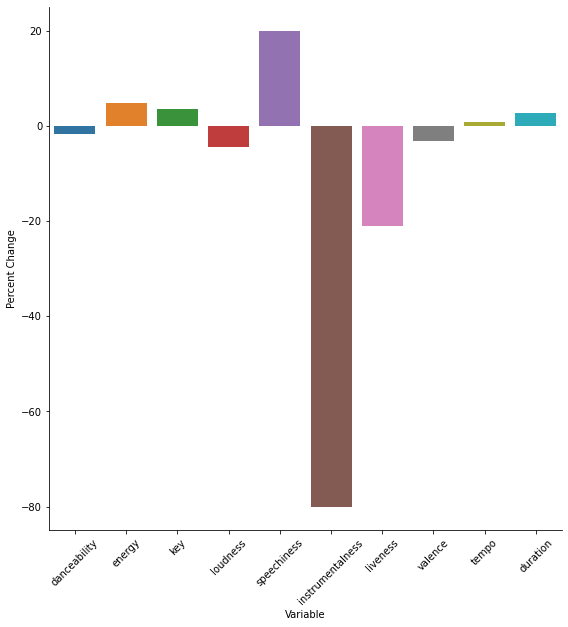

In [231]:
plot_df = new_df.drop('popularity', axis = 1)
plot_df = plot_df.transpose()[2].to_frame().reset_index()
plot_df.columns = ['Variable', 'Percent Change']

sns.catplot(
    data=plot_df, x="Variable", y="Percent Change",
    kind="bar", height=8, aspect=1,
)
plt.xticks(rotation=45)

plt.savefig('percent_difference.png')

In [212]:
new_df = df.sort_values('popularity',ascending = False).head(10)
new_df.drop(['time_signature', 'mode', 'key'], axis = 1)

,artist,album,track_name,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,popularity,duration,date,explicit,year
801,Tears For Fears,Songs From The Big Chair (Super Deluxe Edition),Everybody Wants To Rule The World,0.645,0.795,-12.095,0.0527,0.003890,0.1040,0.535,112.067,86.0,251,1985-02-25,False,1985
438,Aerosmith,Aerosmith,Dream On,0.307,0.433,-10.057,0.0290,0.000091,0.3320,0.224,160.900,85.0,267,1973-01-05,False,1973
810,a-ha,Hunting High and Low,Take on Me,0.573,0.902,-7.638,0.0540,0.001250,0.0928,0.876,84.412,85.0,225,1985-06-01,False,1985
813,Bon Jovi,Slippery When Wet,Livin' On A Prayer,0.532,0.887,-3.757,0.0335,0.000214,0.2940,0.795,122.511,84.0,249,1986-08-16,False,1986
647,AC/DC,Highway to Hell,Highway to Hell,0.574,0.913,-4.793,0.1330,0.001580,0.1560,0.423,115.728,84.0,208,1979-07-27,False,1979
739,Elton John,Too Low For Zero,I'm Still Standing,0.504,0.904,-6.863,0.1790,0.121000,0.1400,0.772,176.808,84.0,183,1983-05-30,False,1983
846,Guns N' Roses,Appetite For Destruction,Sweet Child O' Mine,0.454,0.910,-7.766,0.0448,0.099600,0.1160,0.629,125.116,83.0,355,1987-07-21,True,1987
506,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,0.579,0.508,-9.484,0.0270,0.000494,0.0575,0.609,147.125,83.0,391,1976-12-08,False,1976
676,AC/DC,Back In Black,Back In Black,0.310,0.700,-5.678,0.0470,0.009650,0.0828,0.763,188.386,83.0,255,1980-07-25,False,1980
889,AC/DC,The Razors Edge,Thunderstruck,0.502,0.890,-5.175,0.0364,0.011700,0.2170,0.259,133.520,83.0,293,1990-09-24,False,1990
